# EDA

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/Kaggle-Stroke-Dataset/healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#
# Notes:
#
# id --> drop
# avg_glucose_level --> drop (most users will not have this information)
#

In [18]:
print("Percentage of cases with a stroke: {:.2f}%".format(df[df["stroke"]== 1].shape[0] / df.shape[0] * 100))
print("Percentage of cases with no stroke: {:.2f}%".format(df[df["stroke"]== 0].shape[0] / df.shape[0] * 100))

Percentage of cases with a stroke: 4.87%
Percentage of cases with no stroke: 95.13%


In [ ]:
#
# Notes:
# - as expected, will need to deal with imbalance.
#

In [ ]:
# check if it makes sense to drop the column "age"

print(df[(df["age"]< 18) & (df["stroke"]==1)])

print(f"\n\nNumber of datapoints with age < 18: {df[df['age'] < 18].shape[0]}")

        id  gender    age  hypertension  heart_disease ever_married work_type  \
162  69768  Female   1.32             0              0           No  children   
245  49669  Female  14.00             0              0           No  children   

    Residence_type  avg_glucose_level   bmi smoking_status  stroke  
162          Urban              70.37   NaN        Unknown       1  
245          Rural              57.93  30.9        Unknown       1  


Number of datapoints with age < 18: 856


In [ ]:
#
# Notes:
# - 800+ datapoints with age < 18, and 2 stroke cases --> will keep all datapoints regardless of age
# 

In [ ]:
display(df["gender"].value_counts())
display(df["ever_married"].value_counts())
display(df["work_type"].value_counts())
display(df["Residence_type"].value_counts())
display(df["smoking_status"].value_counts())

# For the column "work_type", there's very few datapoints with the value Never_worked (22),
# check if there's any of them with stroke:
df[(df["work_type"] == "Never_worked") & (df["stroke"] == 1)].shape

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

(0, 12)

In [ ]:
#
# Notes:
#
# gender --> 1 datapoint with the value "other", will be removed
# work_type --> IMPORANT -- only 22 datapoints with the value "Never_worked" (none of them with stroke). Will drop them (or do category grouping)
# smoking_status --> unknown in many cases, will keep it as a category on its own (don't think imputation makes sense here)
#

In [33]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#
# Notes:
#
# gender --> convert to numerical (binary encoding)
# ever_married --> convert to numerical (binary encoding)
# Residence_type --> convert to numerical (binary encoding)
#
# work_type --> convert to numerical (one-hot encoding)
# smoking_status --> convert to numerical (one-hot encoding)


In [ ]:
# Check missing values

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#
# Notes:
# - bmi has 201 missing values, will need to deal with it (e.g. imputation)
#

## Distribution (age, bmi)

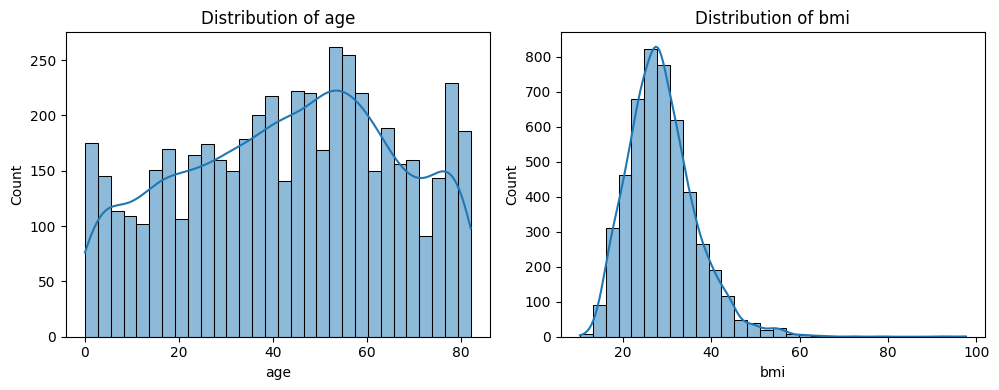

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['age', 'bmi']

plt.figure(figsize=(15, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()


<br>

## Bivariate Analysis


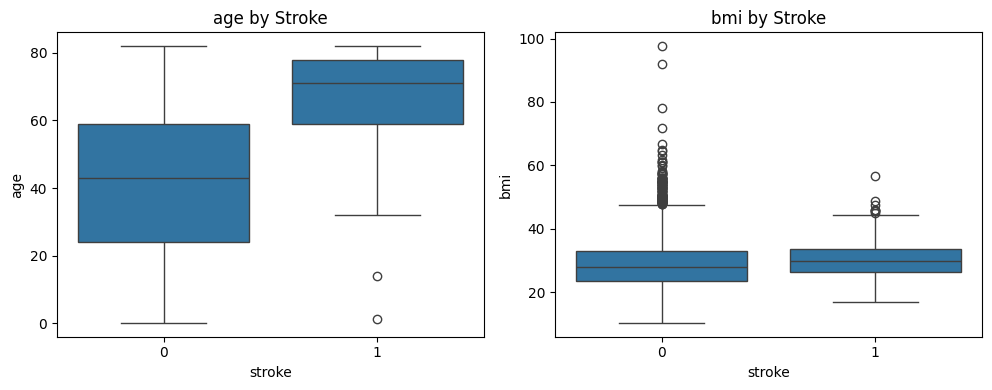

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['age', 'bmi']

plt.figure(figsize=(15, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=feature, data=df)
    plt.title(f'{feature} by Stroke')
    
plt.tight_layout()
plt.show()


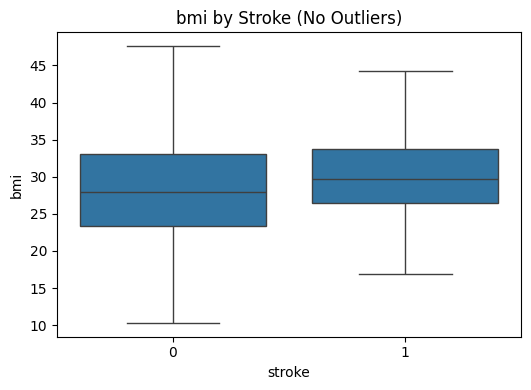

In [ ]:
# Let's see BMi in more detail, without outliers

import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['bmi']

plt.figure(figsize=(15, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=feature, data=df, showfliers=False)
    plt.title(f'{feature} by Stroke (No Outliers)')
    
plt.tight_layout()
plt.show()


In [ ]:
# numeric features grouped by stroke
df.groupby('stroke')[['age', 'hypertension', 'heart_disease', 'bmi']].mean()


,age,bmi,hypertension,heart_disease
stroke,,,,
0,41.971545,28.823064,0.088871,0.047110
1,67.728193,30.471292,0.265060,0.188755


In [ ]:
#
# Notes:
# - age, hypertension and hear_disease seem to be important factors.
# - bmi also seems to be significant.
#

In [76]:
# categorical features grouped by stroke
df.groupby('stroke')[['gender']].value_counts()

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: count, dtype: int64

In [74]:
# Categorical features vs. storke

display(pd.crosstab(df['gender'], df['stroke'], normalize='index'))
display(pd.crosstab(df['ever_married'], df['stroke'], normalize='index'))
display(pd.crosstab(df['work_type'], df['stroke'], normalize='index'))
display(pd.crosstab(df['Residence_type'], df['stroke'], normalize='index'))
display(pd.crosstab(df['smoking_status'], df['stroke'], normalize='index'))

stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000


stroke,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613


stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911


stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


<br><br>

## Correlation


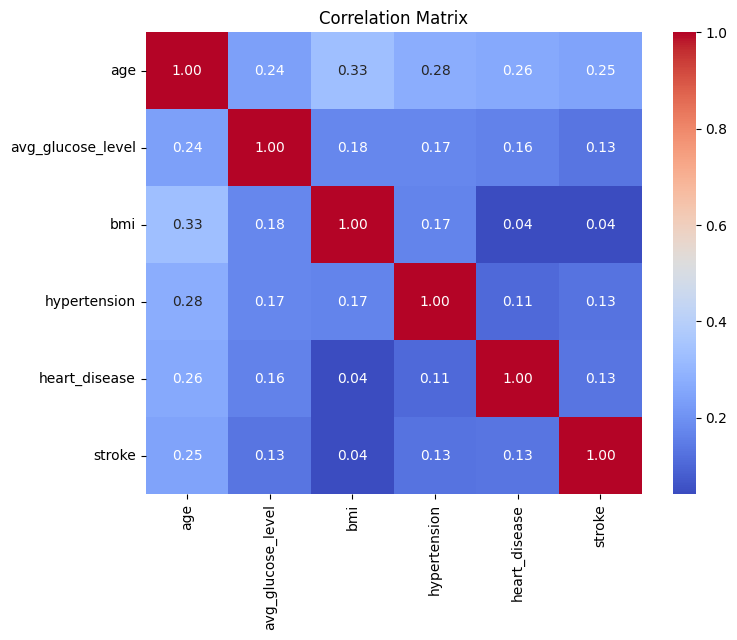

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# Correlation matrix
corr = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
